In [1]:
### GLOWORM SWARM OPTIMIZATION EXAMPLE
### LUKE PETERSON 06/30/2016
### INFO: https://en.wikipedia.org/wiki/Glowworm_swarm_optimization
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from scipy.spatial import distance as dist
import copy
import simpy

In [5]:
# Since the fitness function rates some worms negatively, the lower bound exists
# to add to all of the scores so they are positive before normalization
# The influence factor is divided form all the positive scores to determine the
# range of influence.
dims = 10
num_worms = 20
nturns = 100
lower_bound = 70
influence_factor = 30
max_jitter = .2

# def fitness_function(xy_tuple):
#     x = xy_tuple[0]/2
#     y = xy_tuple[1]/2
#     return np.sin(x**3+ (y-5)**3) + np.cos((y-5)**2) *10 + np.cos(x*2) * 12 * (y-5)

def fitness_function(xy_tuple):
    x = xy_tuple[0]/2
    y = xy_tuple[1]/2
    return np.cos(x) * np.cos(y) * np.exp(-((x - np.pi)**2 + (y - np.pi)**2))

def starting_points():
    return np.random.rand(num_worms,2) * 10
    
def get_score(pop):
    temp = [ (fitness_function(tup)) for tup in pop ]
    normal = [ x + lower_bound for x in temp ]
    return [ x / influence_factor for x in normal ]

# This returns a matrix with the distances between each worm calculated if the
# worm in the row is influenced by the worm in the column, else 0
def influence_matrix(pop, score):
    graph = np.array([np.zeros(num_worms)] * num_worms)
    
    for i in range(num_worms):
        for j in range(num_worms):
            if i == j:
                graph[i][j] = 0
            elif dist.euclidean(pop[i], pop[j]) <= score[j]:
                graph[i][j] = dist.euclidean(pop[i], pop[j])
            else:
                continue
    return graph
    
def next_turn(pop, score, im):
    n_turn = copy.deepcopy(pop)
    
    # X and Y movement is determined by the ratio of distance between worms and
    # the radius of the influencing worm
    # This ensures that closer worms will have more influence than further worms
    # with the same pull, and at the same time worms with large influences will
    # have more pull than other worms of the same distance
    for i in range(num_worms):
        x_move = 0
        y_move = 0
        for j in range(num_worms):
            percent_move = 1 - (im[i][j] / score[j]) if im[i][j] != 0 else 0
            x_move += (pop[j][0] - pop[i][0]) * percent_move / 10 if score[i] < score[j] else 0
            y_move += (pop[j][1] - pop[i][1]) * percent_move / 10 if score[i] < score[j] else 0
        jitter_x = max_jitter * np.random.rand() * np.random.randint(-1,2)
        jitter_y = max_jitter * np.random.rand() * np.random.randint(-1,2)
        n_turn[i][0] += x_move + jitter_x
        n_turn[i][1] += y_move + jitter_y
        
        n_turn[i][0] = keep_in_bounds(n_turn[i][0], dims)
        n_turn[i][1] = keep_in_bounds(n_turn[i][1], dims)
        
    return n_turn
        
def keep_in_bounds(x,dims):
    if x < 0:
        return 0
    elif x > dims:
        return dims
    else:
        return x

In [ ]:
# ### START ###
# pop = starting_points()
# for each in range(nturns):
#     score = get_score(pop)
    
    
#     ### PLOT ###
#     plt.rcdefaults()
#     fig, ax = plt.subplots()
    
#     x = np.arange(0, dims, 0.1)
#     y = np.arange(0, dims, 0.1)
#     xx, yy = np.meshgrid(x, y, sparse=True)
#     z = fitness_function([xx, yy])
#     im = plt.imshow(z, interpolation='bilinear', origin='lower', cmap=cm.gray, extent=(0, dims, 0, dims ))
#     plt.contour(x,y,z,alpha=0.1)
    
#     plt.plot(pop[:,0], pop[:,1], 'ro' )
    
#     ### UNCOMMENT THE FOLLOWING TO SEE WORMS INFLUENCE ###
#     patches = []
#     for i in range(0,num_worms):    
#         patches.append( mpatches.Circle((pop[i][0],pop[i][1]), score[i], ec = "none") )
  
#     colors = np.linspace(0, 1, len(patches))
#     collection = PatchCollection(patches, cmap=plt.cm.hsv, alpha=0.05)
#     collection.set_array(np.array(colors))
#     ax.add_collection(collection)
#     #####
    
#     plt.show()
#     print()
#     name = "0000000" + str(each)
#     name = name[-4:] + '.png'
#     plt.savefig(name, bbox_inches='tight')

#     im = influence_matrix(pop,score)
#     pop = copy.deepcopy(next_turn(pop,score,im))
#     plt.close("all")

In [7]:
### START ###
pop = starting_points()
positions = [pop]
for each in range(nturns):
    score = get_score(pop)        
    im = influence_matrix(pop,score)
    pop = copy.deepcopy(next_turn(pop,score,im))
    positions.append(pop)

In [17]:
len(positions)

101

In [21]:
positions[100][0][0]

2.2320367457099484

In [23]:
for pos in positions[11]:
    print(pos[0])

0.07589379058360167
2.739540468417301
2.508049523867036
2.241536070972132
8.80542177627612
2.547501467685391
8.995482094995513
5.489603347459424
3.2369333568876013
2.1673167986827537
9.641535764793097
9.22758610288533
8.709963011053853
3.3894283324406658
8.841779264782017
9.007178797990635
8.589862409165319
8.985262901334004
0.019390091888057015
8.928367122107224


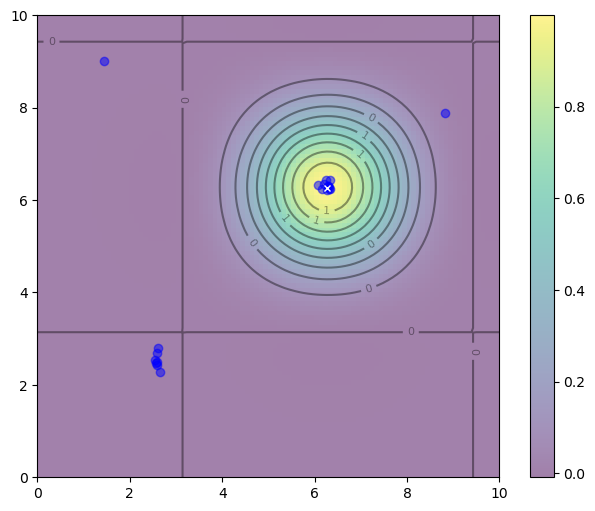

In [10]:
# Plotting - no Animation
x, y = np.array(np.meshgrid(np.linspace(0, dims, 100), np.linspace(0, dims, 100)))
z = fitness_function([x, y])
x_max, y_max = x.ravel()[z.argmax()], y.ravel()[z.argmax()]

fig, ax = plt.subplots(figsize=(8, 6))
img = ax.imshow(z, extent=[0, dims, 0, dims], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_max], [y_max], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
#p_plot = ax.scatter(positions[0][0], positions[0][1], marker='o', color='blue', alpha=0.5)
#nbest_plot = plt.scatter([nbest[0]], [nbest[1]], marker='*', s=100, color='black', alpha=0.4)

i = 100
ax.clear()
ax.imshow(z, extent=[0, dims, 0, dims], origin='lower', cmap='viridis', alpha=0.5)
ax.plot([x_max], [y_max], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
for pos in positions[i]:
    p_plot = ax.scatter(pos[0], pos[1], marker='o', color='blue', alpha=0.5)
#nbest_plot.set_offsets(nbest.reshape(1, -1))
plt.show()

In [11]:
P100 = positions[100]

In [15]:
P100

array([[6.19335121, 6.34056515],
       [6.33380478, 6.2305473 ],
       [6.28273871, 6.29687916],
       [6.24499289, 6.42671193],
       [6.08104018, 6.32852889],
       [6.33212474, 6.44398285],
       [2.59744118, 2.4376077 ],
       [2.5343288 , 2.54771459],
       [2.5979984 , 2.68583664],
       [2.64358116, 2.28392248],
       [6.29546276, 6.30493579],
       [6.30515116, 6.28289244],
       [8.8280666 , 7.88545294],
       [2.56637649, 2.47394911],
       [6.15664893, 6.24958837],
       [2.61190715, 2.80010266],
       [6.31163314, 6.23089516],
       [1.44135389, 9.01839025],
       [6.27752496, 6.21900718],
       [2.57688196, 2.50328014]])

In [25]:
PP100 = np.array([[6.19335121, 6.34056515],
       [6.33380478, 6.2305473 ],
       [6.28273871, 6.29687916],
       [6.24499289, 6.42671193],
       [6.08104018, 6.32852889],
       [6.33212474, 6.44398285],
       [6.18104018, 6.32852889],
       [6.08104018, 6.1852889],
       [6.18273871, 6.19687916],
       [6.04358116, 6.38392248],
       [6.29546276, 6.30493579],
       [6.30515116, 6.28289244],
       [1.0280666 , 9.58545294],
       [6.28515116, 6.02289244],
       [6.15664893, 6.24958837],
       [6.11190715, 6.10010266],
       [6.31163314, 6.23089516],
       [6.44135389, 6.21839025],
       [6.27752496, 6.21900718],
       [9.67688196, 0.50328014]])


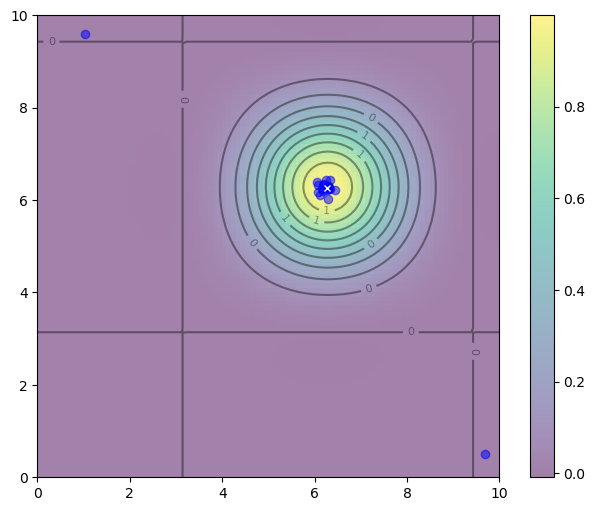

In [26]:
# Plotting - no Animation
x, y = np.array(np.meshgrid(np.linspace(0, dims, 100), np.linspace(0, dims, 100)))
z = fitness_function([x, y])
x_max, y_max = x.ravel()[z.argmax()], y.ravel()[z.argmax()]

fig, ax = plt.subplots(figsize=(8, 6))
img = ax.imshow(z, extent=[0, dims, 0, dims], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_max], [y_max], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
#p_plot = ax.scatter(positions[0][0], positions[0][1], marker='o', color='blue', alpha=0.5)
#nbest_plot = plt.scatter([nbest[0]], [nbest[1]], marker='*', s=100, color='black', alpha=0.4)

ax.clear()
ax.imshow(z, extent=[0, dims, 0, dims], origin='lower', cmap='viridis', alpha=0.5)
ax.plot([x_max], [y_max], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
for pos in PP100:
    p_plot = ax.scatter(pos[0], pos[1], marker='o', color='blue', alpha=0.5)
#nbest_plot.set_offsets(nbest.reshape(1, -1))
plt.show()

In [27]:
x_max, y_max

(6.262626262626262, 6.262626262626262)

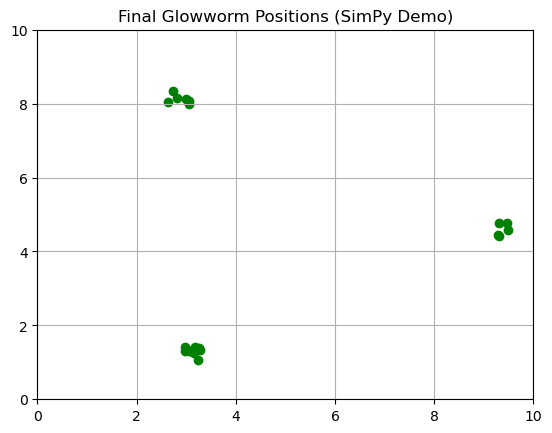

In [31]:
##############################################################################
# GSO PARAMETERS
##############################################################################
dims = 10
num_worms = 20
nturns = 100
lower_bound = 70
influence_factor = 30
max_jitter = 0.2

##############################################################################
# GSO FUNCTIONS
##############################################################################
def fitness_function(xy_tuple):
    x = xy_tuple[0] / 2
    y = xy_tuple[1] / 2
    return (np.sin(x**3 + (y - 5)**3)
            + np.cos((y - 5)**2) * 10
            + np.cos(x * 2) * 12 * (y - 5))

def keep_in_bounds(x, dims):
    if x < 0:
        return 0
    elif x > dims:
        return dims
    else:
        return x

def starting_points():
    """Initialize the worm positions randomly."""
    return np.random.rand(num_worms, 2) * dims

def get_score(pop):
    """Compute each worm's 'influence radius' based on its fitness."""
    temp = [fitness_function(tup) for tup in pop]
    shifted = [t + lower_bound for t in temp]
    return [val / influence_factor for val in shifted]

def influence_matrix(pop, score):
    """If worm j is within worm j's radius, record distance; else 0."""
    graph = np.zeros((num_worms, num_worms))
    for i in range(num_worms):
        for j in range(num_worms):
            if i == j:
                graph[i][j] = 0
            else:
                distance_ij = dist.euclidean(pop[i], pop[j])
                if distance_ij <= score[j]:
                    graph[i][j] = distance_ij
    return graph

def next_turn(pop, score, inf_mat):
    """Update each worm's position based on the matrix of influences."""
    new_pop = copy.deepcopy(pop)
    for i in range(num_worms):
        x_move = 0.0
        y_move = 0.0
        for j in range(num_worms):
            if inf_mat[i][j] != 0 and score[i] < score[j]:
                percent_move = 1 - (inf_mat[i][j] / score[j])
                x_move += (pop[j][0] - pop[i][0]) * percent_move / 10
                y_move += (pop[j][1] - pop[i][1]) * percent_move / 10
        
        # Add random jitter
        jitter_x = max_jitter * np.random.rand() * np.random.randint(-1,2)
        jitter_y = max_jitter * np.random.rand() * np.random.randint(-1,2)
        
        new_pop[i][0] += x_move + jitter_x
        new_pop[i][1] += y_move + jitter_y
        
        # Bound checking
        new_pop[i][0] = keep_in_bounds(new_pop[i][0], dims)
        new_pop[i][1] = keep_in_bounds(new_pop[i][1], dims)

    return new_pop

##############################################################################
# SIMPY INTEGRATION
##############################################################################
def glowworm_optimization(env, pop, positions, nturns):
    """
    A generator (process) that runs GSO for 'nturns' iterations in a SimPy environment.
    Each iteration is considered one time-step in the simulation.
    """
    for step in range(nturns):
        # Compute glowworm logic
        score = get_score(pop)
        inf_mat = influence_matrix(pop, score)
        pop = next_turn(pop, score, inf_mat)

        # Store positions for later analysis or plotting
        positions.append(copy.deepcopy(pop))

        # You could place logging, resource usage, or other simulation interactions here
        
        # Advance simulated time by 1 time unit
        yield env.timeout(1)

def run_gso_simpy():
    """
    Sets up the SimPy environment, runs the glowworm process,
    and returns the recorded positions.
    """
    env = simpy.Environment()

    # Initial population
    pop = starting_points()

    # This list will store the population positions at each turn
    positions = [copy.deepcopy(pop)]

    # Create and start the GSO process
    env.process(glowworm_optimization(env, pop, positions, nturns))

    # Run the simulation
    env.run()

    return positions

##############################################################################
# MAIN (Demo)
##############################################################################
if __name__ == "__main__":
    all_positions = run_gso_simpy()

    # For illustration, let's just plot the final positions of the worms.
    # You can expand this to animate or analyze multiple steps.
    final_positions = all_positions[-1]
    xs = [p[0] for p in final_positions]
    ys = [p[1] for p in final_positions]

    plt.scatter(xs, ys, color='green')
    plt.title("Final Glowworm Positions (SimPy Demo)")
    plt.xlim(0, dims)
    plt.ylim(0, dims)
    plt.grid(True)
    plt.show()

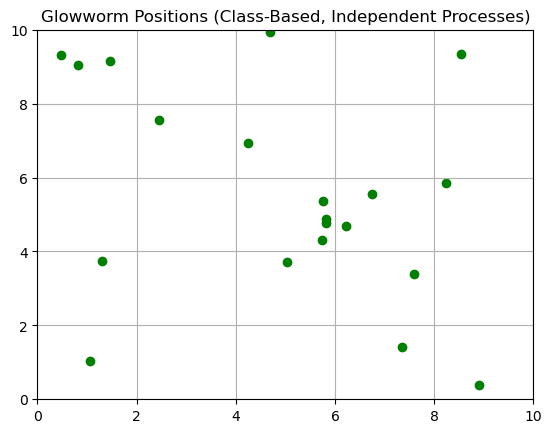

In [32]:
DIMS = 10
NUM_WORMS = 20
NTURNS = 100
LOWER_BOUND = 70
INFLUENCE_FACTOR = 30
MAX_JITTER = 0.2

def fitness_function(xy_tuple):
    x = xy_tuple[0] / 2
    y = xy_tuple[1] / 2
    return (np.sin(x**3 + (y - 5)**3)
            + 10 * np.cos((y - 5)**2)
            + 12 * (y - 5) * np.cos(2 * x))

def keep_in_bounds(val, dims):
    return max(0, min(dims, val))

##############################################################################
# WORM CLASS (AS A SIMPY PROCESS)
##############################################################################
class Worm:
    def __init__(self, env, worm_id, dims, manager):
        """
        Each worm knows:
          - A reference to the SimPy environment
          - Its own ID, position
          - The search space dimension
          - A reference to a 'manager' that can coordinate steps
        """
        self.env = env
        self.id = worm_id
        self.position = np.random.rand(2) * dims
        self.dims = dims
        self.manager = manager
        
        # Start the worm's behavior as a SimPy process
        self.action = env.process(self.run())
        
    def get_fitness(self):
        return fitness_function(self.position)

    def get_influence_radius(self):
        raw_fit = self.get_fitness() + LOWER_BOUND
        return raw_fit / INFLUENCE_FACTOR
    
    def run(self):
        """
        Worm logic, run as a concurrent SimPy process.
        At each iteration (time step), the worm:
          - Waits until manager signals "next step" (barrier)
          - Reads all positions from last iteration
          - Updates its own position
          - Waits for end of iteration
          - Yields env.timeout(1)
        """
        for step in range(self.manager.nturns):
            # 1) Wait for manager to let us proceed
            yield self.manager.start_iteration_event[self.id]

            # 2) Synchronously read last iteration's worm positions
            #    (So every worm uses the same “old” positions.)
            old_positions = self.manager.last_positions  
            
            # 3) Move toward neighbors
            x_move = 0.0
            y_move = 0.0
            my_score = self.get_fitness()
            my_radius = self.get_influence_radius()

            for j, other_pos in enumerate(old_positions):
                # Skip my own position
                if j == self.id:
                    continue
                d = dist.euclidean(self.position, other_pos)
                
                # To check the other worm's radius & fitness, we need the manager
                other_fitness = fitness_function(other_pos)
                other_radius  = (other_fitness + LOWER_BOUND) / INFLUENCE_FACTOR

                if d <= other_radius and other_fitness > my_score:
                    fraction = 1.0 - (d / other_radius)
                    x_move += (other_pos[0] - self.position[0]) * fraction / 10.0
                    y_move += (other_pos[1] - self.position[1]) * fraction / 10.0

            # Add jitter
            jitter_x = MAX_JITTER * np.random.rand() * np.random.randint(-1, 2)
            jitter_y = MAX_JITTER * np.random.rand() * np.random.randint(-1, 2)
            
            self.position[0] += x_move + jitter_x
            self.position[1] += y_move + jitter_y

            # Bound checking
            self.position[0] = keep_in_bounds(self.position[0], self.dims)
            self.position[1] = keep_in_bounds(self.position[1], self.dims)
            
            # 4) Signal manager that I'm done
            self.manager.end_iteration_event.succeed()
            self.manager.end_iteration_event = self.env.event()
            
            # 5) Advance simulated time by 1
            yield self.env.timeout(1)

##############################################################################
# MANAGER CLASS
##############################################################################
class GSOManager:
    def __init__(self, env, dims, num_worms, nturns):
        """
        This manager coordinates the synchronous steps of GSO using events.
        """
        self.env = env
        self.dims = dims
        self.num_worms = num_worms
        self.nturns = nturns

        # The list of worms
        self.worms = []
        
        # last_positions will store the snapshot of each worm’s position
        # from the previous iteration
        self.last_positions = None

        # We'll create an event for each worm to start an iteration
        # But in practice, we only need one event for all worms if truly synchronous.
        self.start_iteration_event = [env.event() for _ in range(num_worms)]
        
        # We'll create a single event that each worm uses to signal "I’m done"
        self.end_iteration_event = env.event()

        # Start manager process
        self.manager_proc = env.process(self.run_manager())

        # Create all worms
        for i in range(num_worms):
            w = Worm(env, i, dims, self)
            self.worms.append(w)

    def run_manager(self):
        """
        Main manager logic:
          - For each iteration, gather worm positions from last iteration
          - Trigger all worms to do their update
          - Wait for all worms to finish
          - Repeat until nturns complete
        """
        for step in range(self.nturns):
            # 1) Snapshot current positions (for synchronous read)
            self.last_positions = [copy.deepcopy(w.position) for w in self.worms]

            # 2) Trigger each worm to start iteration
            for e in self.start_iteration_event:
                e.succeed()
            self.start_iteration_event = [self.env.event() for _ in range(self.num_worms)]

            # 3) Wait for all worms to finish
            #    Because each worm calls "self.manager.end_iteration_event.succeed()"
            #    we need to do that 'num_worms' times to ensure all are done.
            for _ in range(self.num_worms):
                yield self.end_iteration_event

            # Recreate a fresh event that the worms will use in next iteration
            self.end_iteration_event = self.env.event()

    def get_positions(self):
        """
        Helper to read all current worm positions (e.g., for plotting).
        """
        return [copy.deepcopy(w.position) for w in self.worms]

##############################################################################
# RUN & DEMO
##############################################################################
def run_gso_simpy():
    env = simpy.Environment()
    manager = GSOManager(env, DIMS, NUM_WORMS, NTURNS)
    env.run()  # runs until the manager and all worms finish
    # Return final positions or the entire trajectory if desired.
    final_positions = manager.get_positions()
    return final_positions

if __name__ == "__main__":
    final_positions = run_gso_simpy()
    xs = [pos[0] for pos in final_positions]
    ys = [pos[1] for pos in final_positions]

    plt.scatter(xs, ys, c='green')
    plt.title("Glowworm Positions (Class-Based, Independent Processes)")
    plt.xlim(0, DIMS)
    plt.ylim(0, DIMS)
    plt.grid(True)
    plt.show()